# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url =f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=263af797f39043e0e35be298b89cd9fe&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=263af797f39043e0e35be298b89cd9fe&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | yuzhno-kurilsk
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | tamanrasset
Processing Record 7 of Set 1 | cabedelo
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | marka
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | wuyishan
Processing Record 16 of Set 1 | pumiao
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | kotel'nikovo
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | vingt cinq
City not found. Ski

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,5.46,81,61,1.37,RU,1726298231
1,yuzhno-kurilsk,44.0306,145.8556,15.37,68,100,4.69,RU,1726298232
2,port-aux-francais,-49.3500,70.2167,2.71,80,58,10.53,TF,1726298233
3,grytviken,-54.2811,-36.5092,-1.03,88,22,6.23,GS,1726298234
4,waitangi,-43.9535,-176.5597,9.21,66,9,3.14,NZ,1726298236


In [7]:
# Export the City_Data into a csv
import os
output_dir="output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

In [8]:
# Read saved data
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,5.46,81,61,1.37,RU,1726298231
1,yuzhno-kurilsk,44.0306,145.8556,15.37,68,100,4.69,RU,1726298232
2,port-aux-francais,-49.3500,70.2167,2.71,80,58,10.53,TF,1726298233
3,grytviken,-54.2811,-36.5092,-1.03,88,22,6.23,GS,1726298234
4,waitangi,-43.9535,-176.5597,9.21,66,9,3.14,NZ,1726298236


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

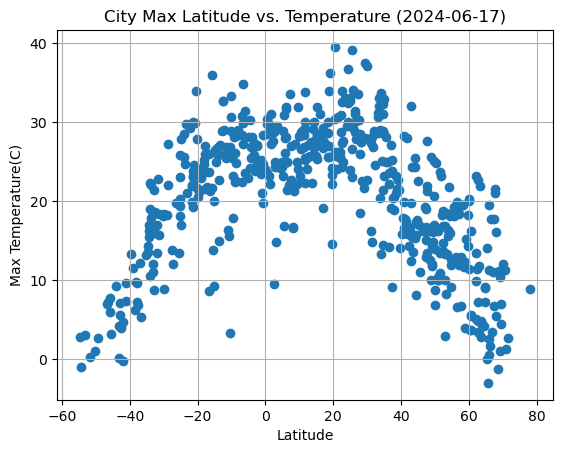

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

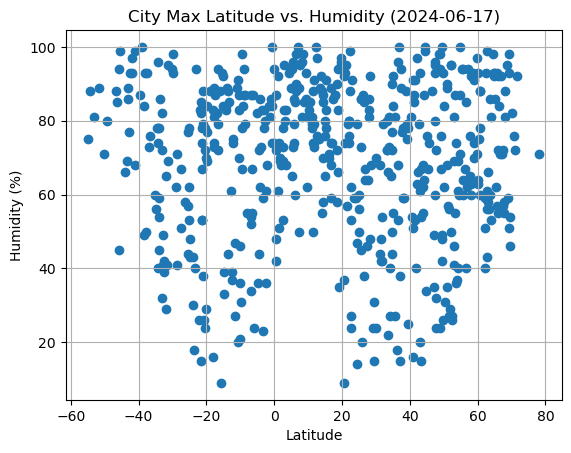

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

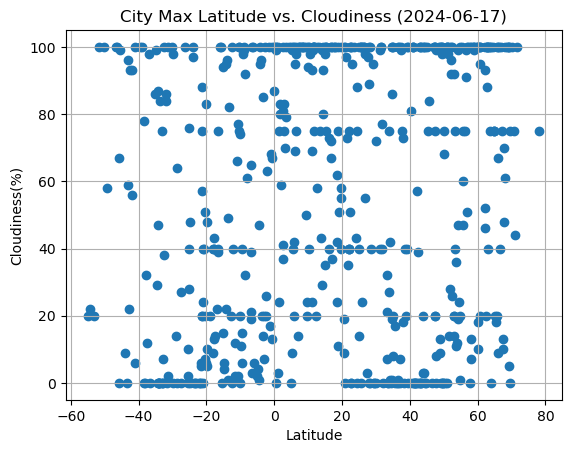

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

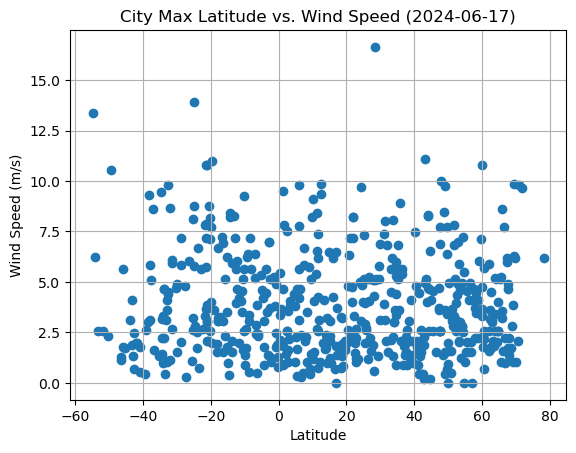

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err=stats.linregress(x.y)
    line=slope*x+intercept

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,5.46,81,61,1.37,RU,1726298231
1,yuzhno-kurilsk,44.0306,145.8556,15.37,68,100,4.69,RU,1726298232
5,tamanrasset,22.7850,5.5228,24.95,53,0,1.03,DZ,1726298237
8,petropavlovsk-kamchatsky,53.0452,158.6483,13.33,41,20,7.00,RU,1726298240
9,iqaluit,63.7506,-68.5145,4.85,86,75,2.57,CA,1726298241


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,port-aux-francais,-49.3500,70.2167,2.71,80,58,10.53,TF,1726298233
3,grytviken,-54.2811,-36.5092,-1.03,88,22,6.23,GS,1726298234
4,waitangi,-43.9535,-176.5597,9.21,66,9,3.14,NZ,1726298236
6,cabedelo,-6.9811,-34.8339,22.37,87,39,5.19,BR,1726298238
7,kununurra,-15.7667,128.7333,35.99,9,100,5.14,AU,1726298035


###  Temperature vs. Latitude Linear Regression Plot

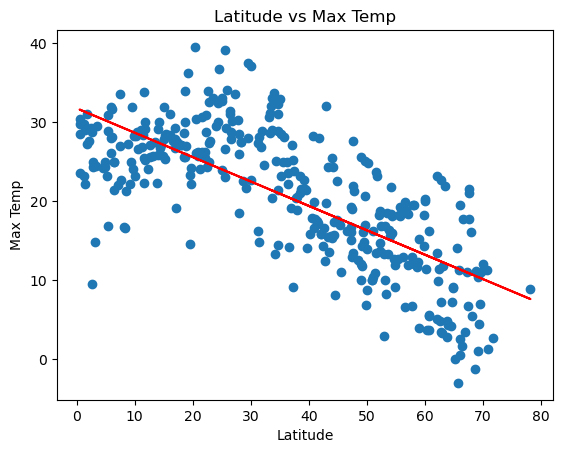

The r^2 value is : 0.5346320038981517


In [19]:
# Linear regression on Northern Hemisphere

northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Max Temp']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()
print(f"The r^2 value is :", r_squared)

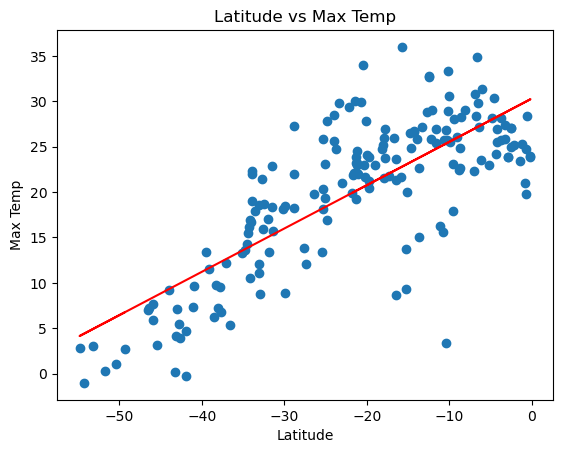

The r^2 value is : 0.6097603424387162


In [25]:
# Linear regression on Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Max Temp']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()
print(f"The r^2 value is :", r_squared)

When comparing Latitude to Max temperature:  
                                  The Northern hemishpere has a negative correlation
                                  The Southern Hempshpere has a positive correlation 

### Humidity vs. Latitude Linear Regression Plot

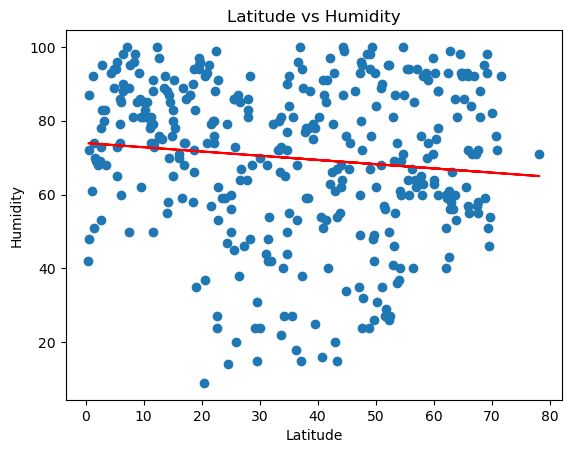

The r^2 value is : 0.012302255762007278


In [26]:
# Northern Hemisphere
northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Humidity']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()
print(f"The r^2 value is :", r_squared)

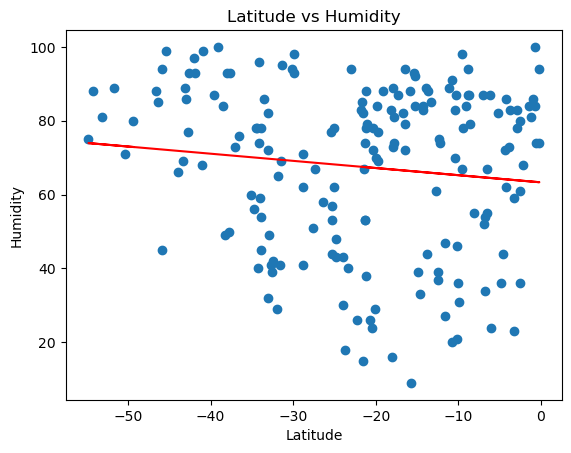

The r^2 value is : 0.01412542430483174


In [27]:
# Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Humidity']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()
print(f"The r^2 value is :", r_squared)

 When comparing Latitude to Max Humidity:
                                    The Northern hemishpere has a slightly negative correlation
                                    The Southern Hempshpere has a slightly negative correlation 

### Cloudiness vs. Latitude Linear Regression Plot

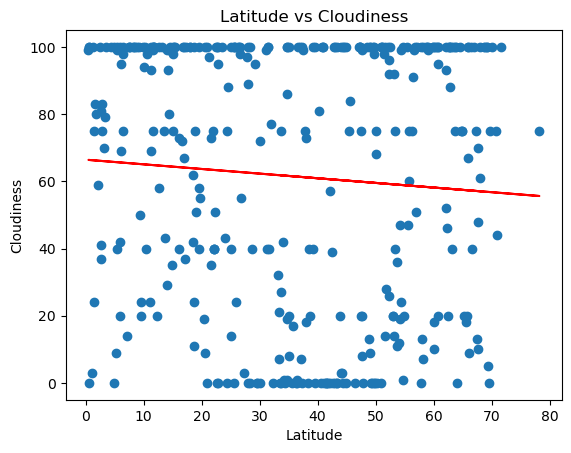

The r^2 value is : 0.005155253988077513


In [28]:
# Northern Hemisphere
northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Cloudiness']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()
print(f"The r^2 value is :", r_squared)

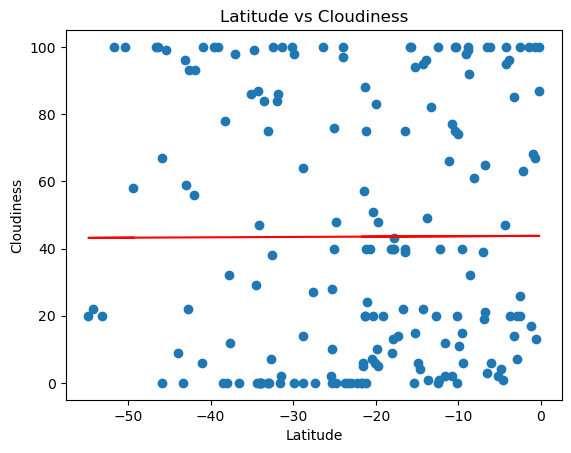

The r^2 value is : 1.5058715305028829e-05


In [31]:
# Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Cloudiness']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()
print(f"The r^2 value is :", r_squared)

 When comparing Latitude to Cloudiness:
                                  The Northern hemishpere has a slightly negative correlation
                                  The Southern Hempshpere has a no correlation 

### Wind Speed vs. Latitude Linear Regression Plot

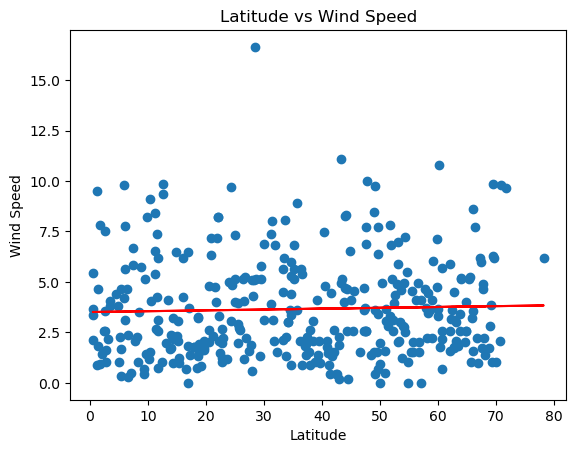

The r^2 value is : 0.0011869893837118544


In [30]:
# Northern Hemisphere
northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Wind Speed']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()
print(f"The r^2 value is :", r_squared)

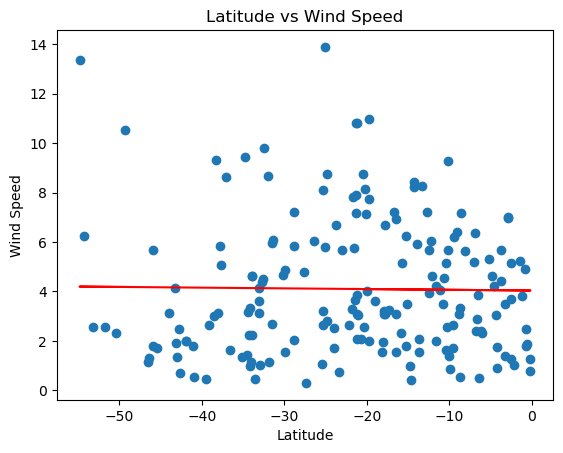

The r^2 value is : 0.0002117846774382918


In [32]:
# Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Wind Speed']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()
print(f"The r^2 value is :", r_squared)

 When comparing Latitude to Max temperature:
                                            The Northern hemishpere has a slightly positive correlation
                                            The Southern Hempshpere has a slightly negative correlation 